In [208]:
from pathlib import Path
from random import choice, randint
from textwrap import wrap
from io import BytesIO
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageOps
from IPython.display import display


In [209]:
FONTS = list(Path("../fonts").glob("*.ttf"))
print(f"Found {len(FONTS)} local fonts: {FONTS}")


Found 4 local fonts: [WindowsPath('../fonts/BlackOpsOne-Regular.ttf'), WindowsPath('../fonts/Blackout-Midnight.ttf'), WindowsPath('../fonts/BowlbyOneSC-Regular.ttf'), WindowsPath('../fonts/TitanOne-Regular.ttf')]


In [210]:
IMAGE_DIR = Path("../images")
IMAGE_SUBDIRS = [d for d in IMAGE_DIR.iterdir() if d.is_dir()]
print(f"Found {len(IMAGE_SUBDIRS)} local image subdirectories: {IMAGE_SUBDIRS}")


Found 1 local image subdirectories: [WindowsPath('../images/tank1')]


In [211]:
NAMES = [
    "Bridget Von Hammeries",
    "Vikita Van Go-Go",
    "Pixie Plunder Girl",
    "Candy B. Ambush",
    "Hurtz Jenasaurus",
    "Bleed Only Discomfort",
    "Salty Skoolyard",
    "Brute-E-Licious",
    "Agri-Mightya",
    "Polly Pack-a-Patty",
    "Debby Does Derbyfall",
    "Buster St.umblebear",
]


In [212]:
COLOR_PAIRS = [
    ("#9B80B6", "#120920"),
    ("#763C04", "#92C9F6"),
    ("#F7E533", "#8415EA"),
    ("#6D2581", "#51FA8C"),
    ("#2F6269", "#A8E518"),
    ("#AA23A3", "#14FCBC"),
]


In [213]:
name = choice(NAMES)
print(f"Name: {name}")


Name: Hurtz Jenasaurus


In [214]:
number = str(randint(1, 9999))
print(f"Number: {number}")


Number: 6365


In [215]:
color_pair = choice(COLOR_PAIRS)
bg_color, fg_color = color_pair
print(f"Color pair: {color_pair}")


Color pair: ('#763C04', '#92C9F6')


In [216]:
font = choice(FONTS)
font_data = font.read_bytes()
print(f"Font: {font}")


Font: ..\fonts\BowlbyOneSC-Regular.ttf


In [217]:
im_scale = 0.3


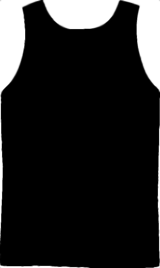

In [218]:
image_path = choice(list(IMAGE_SUBDIRS))
mask = Image.open(image_path / "mask.png")
im_gray = ImageOps.grayscale(mask)
display(im_gray.resize((int(im_gray.width * im_scale), int(im_gray.height * im_scale))))


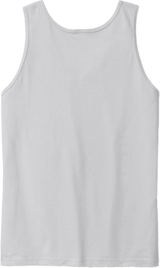

In [219]:
im_overlay = Image.open(image_path / "overlay.png")
display(
    im_overlay.resize(
        (int(im_overlay.width * im_scale), int(im_overlay.height * im_scale))
    )
)


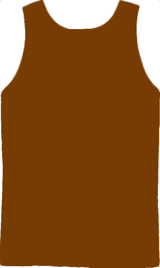

In [220]:
# colorize the jersey with our chosen name's "background" color
im_color = ImageOps.colorize(im_gray, bg_color, "white")
display(im_color.resize((int(im_color.width * scale), int(im_color.height * scale))))


In [221]:
max_width = im_color.width * 0.6
draw = ImageDraw.Draw(im_color)


In [222]:
def text_wrap(text, font, max_width):
    # From https://fiveminutes.today/articles/putting-text-on-images-with-python-pil/
    lines = []
    # If the width of the text is smaller than image width
    # we don't need to split it, just add it to the lines array
    # and return
    if font.getsize(text)[0] <= max_width:
        lines.append(text)
    else:
        # split the line by spaces to get words
        words = text.split(" ")
        i = 0
        # append every word to a line while its width is shorter than image width
        while i < len(words):
            line = ""
            while i < len(words) and font.getsize(line + words[i])[0] <= max_width:
                line = line + words[i] + " "
                i += 1
            if not line:
                line = words[i]
                i += 1
            # when the line gets longer than the max width do not append the word,
            # add the line to the lines array
            lines.append(line.strip())
    return lines


In [223]:
name_font = ImageFont.truetype(BytesIO(font_data), 100)


In [224]:
# get size of name in our chosen font
name_width, name_height = draw.textsize(name, font=name_font)


C:\Users\dunn0172\AppData\Local\Temp\ipykernel_1728\4286772679.py:2: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  name_width, name_height = draw.textsize(name, font=name_font)


In [225]:
# break up name into multiple lines if necessary to fit on shirt
lines = text_wrap(name, name_font, max_width)
lines


C:\Users\dunn0172\AppData\Local\Temp\ipykernel_1728\1465846566.py:7: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] <= max_width:
C:\Users\dunn0172\AppData\Local\Temp\ipykernel_1728\1465846566.py:16: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  while i < len(words) and font.getsize(line + words[i])[0] <= max_width:


['Hurtz', 'Jenasaurus']

In [226]:
# start to place name on shirt image - with current template, starting 20% down from top works well
start_y = (im_color.height - name_height) * 0.3
y = start_y


In [227]:
for line in lines:
    # add each line of name text to the image, centered
    line_width, line_height = draw.textsize(line, font=name_font)
    draw.text(
        ((im_color.width - line_width) / 2, y),
        line,
        fill=fg_color,
        font=name_font,
    )
    y += line_height


C:\Users\dunn0172\AppData\Local\Temp\ipykernel_1728\1491947582.py:3: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  line_width, line_height = draw.textsize(line, font=name_font)
C:\Users\dunn0172\AppData\Local\Temp\ipykernel_1728\1491947582.py:3: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  line_width, line_height = draw.textsize(line, font=name_font)


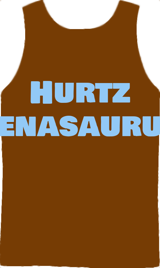

In [228]:
display(
    im_color.resize((int(im_color.width * im_scale), int(im_color.height * im_scale)))
)


In [229]:
NUMBER_FONT_SIZE = 200


In [230]:
number_font = ImageFont.truetype(BytesIO(font_data), NUMBER_FONT_SIZE)


In [231]:
number_width, number_height = draw.textsize(str(number), font=number_font)


C:\Users\dunn0172\AppData\Local\Temp\ipykernel_1728\208657854.py:1: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  number_width, number_height = draw.textsize(str(number), font=number_font)


In [232]:
while number_width > max_width:
    NUMBER_FONT_SIZE = NUMBER_FONT_SIZE - 10
    number_font = ImageFont.truetype(BytesIO(font_data), NUMBER_FONT_SIZE)
    number_width, number_height = draw.textsize(number, font=number_font)


C:\Users\dunn0172\AppData\Local\Temp\ipykernel_1728\2950620850.py:4: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  number_width, number_height = draw.textsize(number, font=number_font)
C:\Users\dunn0172\AppData\Local\Temp\ipykernel_1728\2950620850.py:4: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  number_width, number_height = draw.textsize(number, font=number_font)
C:\Users\dunn0172\AppData\Local\Temp\ipykernel_1728\2950620850.py:4: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  number_width, number_height = draw.textsize(number, font=number_font)
C:\Users\dunn0172\AppData\Local\Temp\ipykernel_1728\2950620850.py:4: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  nu

In [233]:
# once number text will fit on shirt, add it to the image
draw.text(
    ((im_color.width - number_width) / 2, y), number, fill=fg_color, font=number_font
)


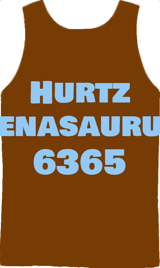

In [234]:
display(
    im_color.resize((int(im_color.width * im_scale), int(im_color.height * im_scale)))
)
